# First capstone project 
## Heat-disease project

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build machine learning model capable of prediting whether or not the person has heart disease 

We are going to follow following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features 
5. Modeling
6. Experimentation



## Preparing the tools 

We're going to use pandas, matplotlib, numpy for data analysis and menipulation.

In [2]:
# Import all the tools we need
# Regular Exploratory data analysis (EDA) an ploting liblraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model fro sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

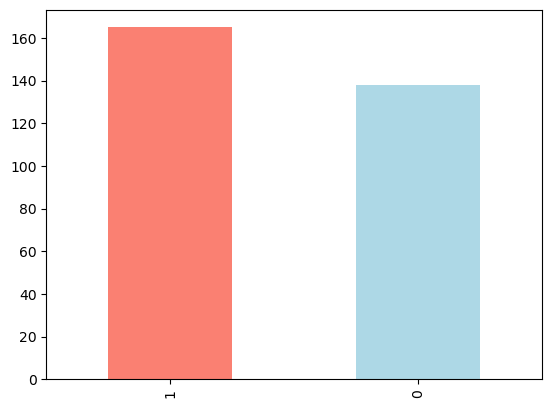

In [7]:
df["target"].value_counts().plot(kind="bar",color = ["salmon","lightblue"]);

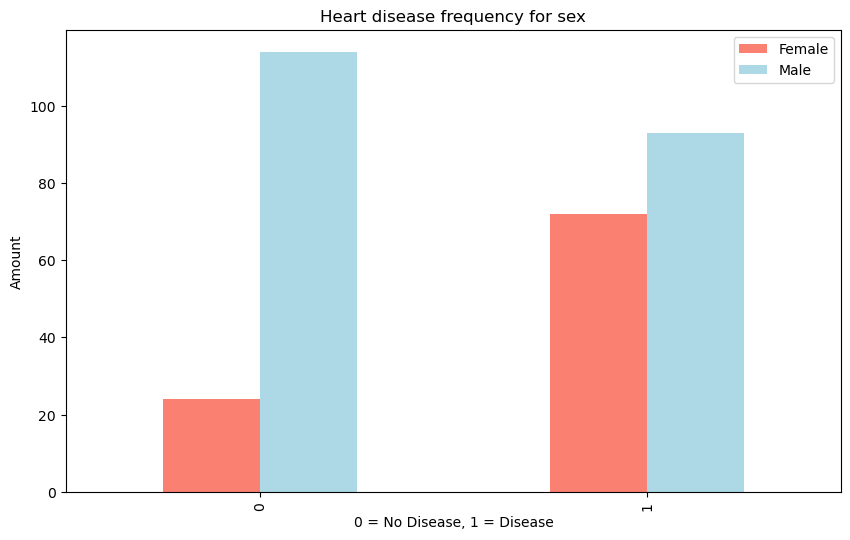

In [10]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

## Age vs Max heart rate for Heart disease


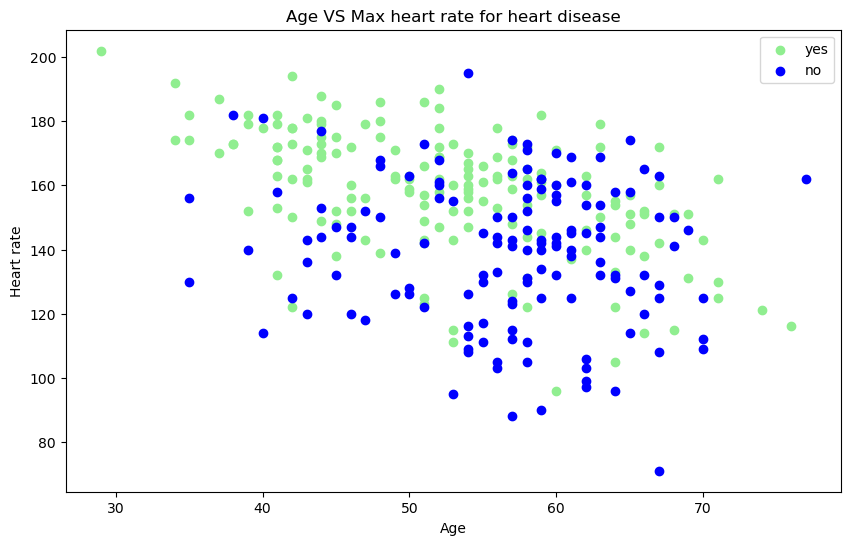

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "lightgreen")

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = "blue")

plt.title("Age VS Max heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.legend(["yes","no"]);

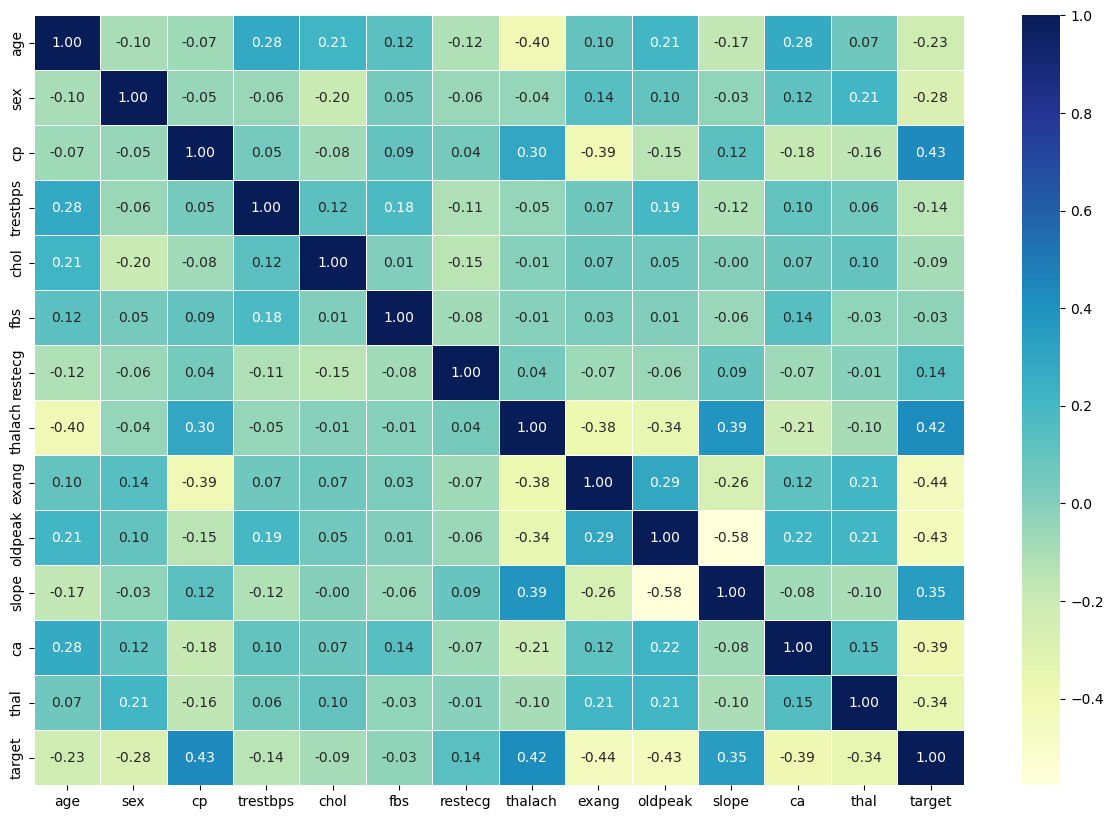

In [19]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

# Geting our data ready

In [20]:
x = df.drop("target",axis=1)
y = df["target"]

In [21]:
# Spliting our data into test train split. 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [36]:
# put models into dictionary
models = {"Logist Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Creates a function to fit and score a model
def fit_and_score(models, x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    models: dict of different sklearn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: testig labels
    """
    # setup a random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_score={}
    # Loop through models
    for name,model in models.items():
        # Fit the model to tranning data
        model.fit(x_train, y_train)
        # evaluate the model and append its score to model_score
        model_score[name] = model.score(x_test, y_test)
    return model_score 

In [37]:
model_score = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)
model_score

/Users/arnavlahane/ml/heart-disease-project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logist Regression': 0.8688524590163934,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

In [45]:
# Lets tune KNN
train_score = []
test_score = []
# Create list of different values for n_neighbors
neighbors = range(1, 21)
# Set up KNN model
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fitting the algoithims
    knn.fit(x_train,y_train)
    # Update the training score 
    train_score.append(knn.score(x_train,y_train))
    # Update testing score
    test_score.append(knn.score(x_test,y_test))
    

In [46]:
train_score

[1.0,
 0.7892561983471075,
 0.768595041322314,
 0.7479338842975206,
 0.7520661157024794,
 0.7396694214876033,
 0.7396694214876033,
 0.71900826446281,
 0.7396694214876033,
 0.7272727272727273,
 0.7148760330578512,
 0.7024793388429752,
 0.7066115702479339,
 0.7107438016528925,
 0.6859504132231405,
 0.7024793388429752,
 0.7024793388429752,
 0.6900826446280992,
 0.7024793388429752,
 0.6983471074380165]

In [47]:
test_score

[0.6557377049180327,
 0.5901639344262295,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.5901639344262295,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.6229508196721312,
 0.5737704918032787,
 0.5901639344262295]

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
   * LogisticRegression
   * RandomForestClassifier

In [60]:
#Creating hyper Parameter for logistic regression
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

# Creating Hyperparameter for Random Forest Classifier
rf_grid = {
    "n_estimators":np.arange(10,100,50),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [56]:
# Tuning logistic regression 
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)

# Fit Random hyperparameter search for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [58]:
rs_log_reg.score(x_test, y_test)

0.8688524590163934

In [61]:
# For Random forest classifier
np.random.seed(42)

#Setup hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit Random hyperparameter search for RandomForestClassifier
rs_rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [62]:
rs_rfc.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_depth': 5}

In [63]:
rs_rfc.score(x_test,y_test)

0.8524590163934426

## Hyperparameter tuning using GridSearchCV

Since our LogisticRegression is giving best results We will tune it further with GridSearchCV

In [65]:
# Different hyperparameter for LogisticRegression
log_reg_grid = {
     "C": np.logspace(-4,4,30),
    "solver": ["liblinear"]
}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit Grid Hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
gs_log_reg.score(x_test,y_test)

0.8688524590163934

## Evaluting our model


In [79]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(x_test)

In [80]:
y_preds
from sklearn.metrics import roc_curve, auc

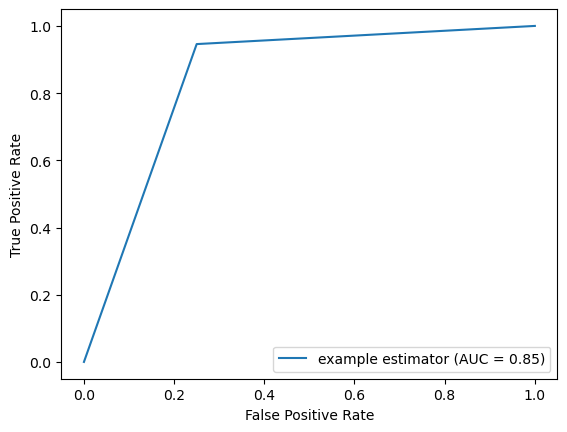

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
dis = RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name='logisticregressor  estimator')
dis.plot()
plt.show()

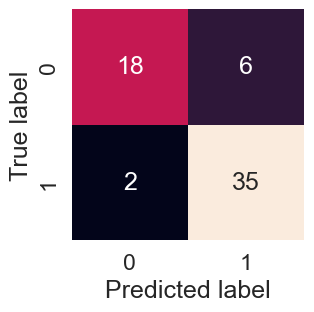

In [82]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [83]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [86]:
clf = LogisticRegression(C= 0.20433597178569418, solver = 'liblinear')

In [88]:
# Cross-validation accuracy
cv_score = cross_val_score(clf,x,y, cv= 5 , scoring = "accuracy")
cv_score

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [100]:
cv_acc = cv_score.mean()

In [101]:
# Cross Validation precision
cv_precision = cross_val_score(clf,x,y, cv= 5 , scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [102]:
# Cross_validated recall
cv_recall = cross_val_score(clf,x,y, cv= 5 , scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [103]:
# Cross-Validation f1
cv_f1 = cross_val_score(clf,x,y, cv= 5 , scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

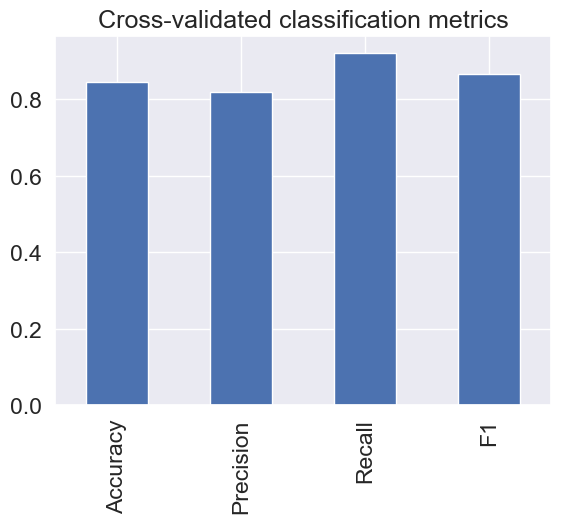

In [104]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [106]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [107]:
# Check coef_
clf.coef_

array([[ 0.00794987, -0.80851308,  0.66656147, -0.01350744, -0.00364803,
        -0.04254632,  0.20484171,  0.02937296, -0.4929669 , -0.55458956,
         0.24391871, -0.71262891, -0.56780588]])

In [108]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.007949873858346826,
 'sex': -0.8085130762897554,
 'cp': 0.6665614723502741,
 'trestbps': -0.013507443988679436,
 'chol': -0.003648027092780937,
 'fbs': -0.04254632478786094,
 'restecg': 0.20484171306896964,
 'thalach': 0.029372957206129553,
 'exang': -0.4929668988654317,
 'oldpeak': -0.554589560438274,
 'slope': 0.24391871183622021,
 'ca': -0.7126289102307353,
 'thal': -0.5678058802025139}

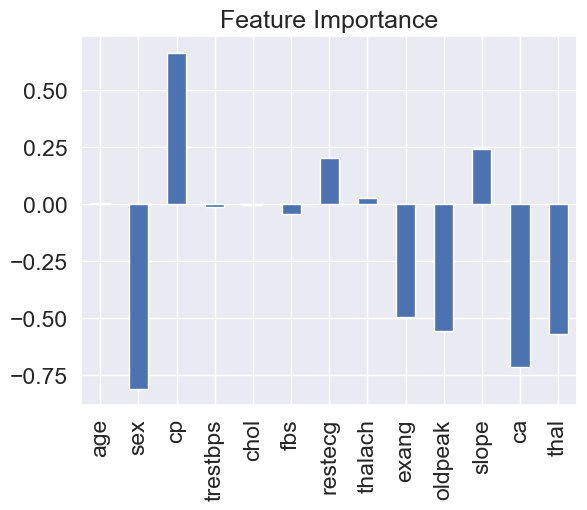

In [109]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [110]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [111]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
